In [7]:
import tensorflow as tf
from tensorflow.examples.tutorials.mnist import input_data
import numpy as np
import matplotlib.gridspec as gridspec
from libs.utils import weight_variable, bias_variable
import matplotlib.pyplot as plt

%matplotlib inline

In [8]:
mnist = input_data.read_data_sets("MNIST_data/", one_hot = True)
x_train = mnist.train.images
y_train = mnist.train.labels
x_test = mnist.test.images
y_test = mnist.test.labels

Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz


In [9]:
batch_size = 256
g_dim = 128

In [12]:
x_d = tf.placeholder(tf.float32, shape = [None, 784])
x_g = tf.placeholder(tf.float32, shape = [None, 128])

weights = {
    "w_d1" : weight_variable([784, 128]),
    "w_d2" : weight_variable([128, 1]),
    "w_g1" : weight_variable([128, 256]),
    "w_g2" : weight_variable([256, 784])
}

biases = {
    "b_d1" : bias_variable([128]),
    "b_d2" : bias_variable([1]),
    "b_g1" : bias_variable([256]),
    "b_g2" : bias_variable([784])
}

var_d = [weights["w_d1"], weights["w_d2"], biases["b_d1"], biases["b_d2"]]
var_g = [weights["w_g1"], weights["w_g2"], biases["b_g1"], biases["b_g2"]]

In [13]:
def generator(z):
    h_g1 = tf.nn.relu(tf.add(tf.matmul(z, weights["w_g1"]), biases["b_g1"]))
    h_g2 = tf.nn.sigmoid(tf.add(tf.matmul(h_g1, weights["w_g2"]),biases["b_g2"]))
    return h_g2

def discriminator(x):
    h_d1 = tf.nn.relu(tf.add(tf.matmul(x, weights["w_d1"]), biases["b_d1"]))
    h_d2 = tf.nn.sigmoid(tf.add(tf.matmul(h_d1, weights["w_d2"]), biases["b_d2"]))
    return h_d2

In [14]:
def sample_Z(m, n):
    return np.random.uniform(-1., 1., size=[m, n])

g_sample = generator(x_g)
d_real= discriminator(x_d)
d_fake = discriminator(g_sample)

d_loss = -tf.reduce_mean(tf.log(d_real) + tf.log(1. - d_fake))
g_loss = -tf.reduce_mean(tf.log(d_fake))

In [15]:
# 只更新 discriminator
d_optimizer = tf.train.AdamOptimizer(0.0005).minimize(d_loss, var_list= var_d)
# 只更新 generator parameters
g_optimizer = tf.train.AdamOptimizer(0.0001).minimize(g_loss, var_list= var_g)

step: 0  d-loss: 1.38378  g-loss: 0.739339
step: 1000  d-loss: 0.0630949  g-loss: 3.75583
step: 2000  d-loss: 0.101891  g-loss: 3.66108
step: 3000  d-loss: 0.0399193  g-loss: 4.32198
step: 4000  d-loss: 0.0723205  g-loss: 4.54197
step: 5000  d-loss: 0.0960376  g-loss: 4.93904


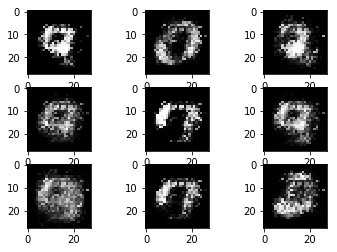

In [35]:
sess = tf.Session()
init = tf.global_variables_initializer()
sess.run(init)
for step in range(5001):
    batch_x = mnist.train.next_batch(batch_size)[0]
    _, d_loss_train = sess.run([d_optimizer, d_loss], feed_dict = {x_d: batch_x, x_g: sample_Z(batch_size, g_dim)})
    _, g_loss_train = sess.run([g_optimizer, g_loss], feed_dict = {x_g: sample_Z(batch_size, g_dim)})
    if step%1000==0:
        print 'step:', step, ' d-loss:', d_loss_train, ' g-loss:', g_loss_train


zz = sample_Z(batch_size, g_dim)
gg = sess.run(g_sample, feed_dict = {x_g: zz})
# gg = sess.run(g_sample, feed_dict = {x_g: sample_Z(batch_size, g_dim)})
gg_pic = np.array([np.reshape(m,(28,28)) for m in gg])
fig, ax = plt.subplots(nrows=3, ncols=3)
for i,row in enumerate(ax):
    for j,col in enumerate(row):
        ax[i][j].imshow(gg_pic[i*3+j], cmap='gray')

step: 0  d-loss: 0.107694  g-loss: 4.98274
step: 1000  d-loss: 0.115155  g-loss: 4.26558
step: 2000  d-loss: 0.0522594  g-loss: 5.36068
step: 3000  d-loss: 0.145474  g-loss: 4.27755
step: 4000  d-loss: 0.182566  g-loss: 4.75718
step: 5000  d-loss: 0.148066  g-loss: 5.55737


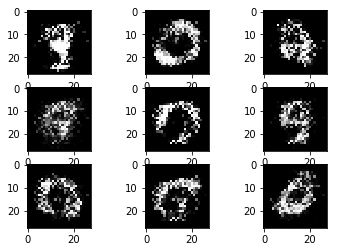

In [36]:
for step in range(5001):
    batch_x = mnist.train.next_batch(batch_size)[0]
    _, d_loss_train = sess.run([d_optimizer, d_loss], feed_dict = {x_d: batch_x, x_g: sample_Z(batch_size, g_dim)})
    _, g_loss_train = sess.run([g_optimizer, g_loss], feed_dict = {x_g: sample_Z(batch_size, g_dim)})
    if step%1000==0:
        print 'step:', step, ' d-loss:', d_loss_train, ' g-loss:', g_loss_train


gg = sess.run(g_sample, feed_dict = {x_g: zz})
# gg = sess.run(g_sample, feed_dict = {x_g: sample_Z(batch_size, g_dim)})
gg_pic = np.array([np.reshape(m,(28,28)) for m in gg])
fig, ax = plt.subplots(nrows=3, ncols=3)
for i,row in enumerate(ax):
    for j,col in enumerate(row):
        ax[i][j].imshow(gg_pic[i*3+j], cmap='gray')

step: 0  d-loss: 0.103685  g-loss: 5.64362
step: 1000  d-loss: 0.0921257  g-loss: 6.48257
step: 2000  d-loss: 0.159985  g-loss: 6.89262
step: 3000  d-loss: 0.200446  g-loss: 6.42459
step: 4000  d-loss: 0.231532  g-loss: 5.5315
step: 5000  d-loss: 0.190248  g-loss: 7.05883


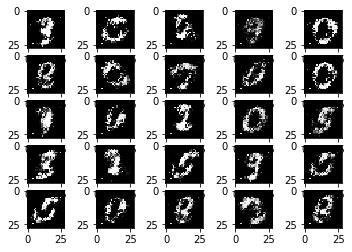

In [37]:
for step in range(5001):
    batch_x = mnist.train.next_batch(batch_size)[0]
    _, d_loss_train = sess.run([d_optimizer, d_loss], feed_dict = {x_d: batch_x, x_g: sample_Z(batch_size, g_dim)})
    _, g_loss_train = sess.run([g_optimizer, g_loss], feed_dict = {x_g: sample_Z(batch_size, g_dim)})
    if step%1000==0:
        print 'step:', step, ' d-loss:', d_loss_train, ' g-loss:', g_loss_train
        
gg = sess.run(g_sample, feed_dict = {x_g: zz})
gg_pic = np.array([np.reshape(m,(28,28)) for m in gg])
fig, ax = plt.subplots(nrows=5, ncols=5)
for i,row in enumerate(ax):
    for j,col in enumerate(row):
        ax[i][j].imshow(gg_pic[i*5+j], cmap='gray')

step: 0  d-loss: 0.240367  g-loss: 7.06192
step: 1000  d-loss: 0.123964  g-loss: 5.62587
step: 2000  d-loss: 0.124397  g-loss: 5.3331
step: 3000  d-loss: 0.227724  g-loss: 4.976
step: 4000  d-loss: 0.14871  g-loss: 6.65376
step: 5000  d-loss: 0.161104  g-loss: 6.11067
step: 6000  d-loss: 0.191366  g-loss: 7.28454
step: 7000  d-loss: 0.214045  g-loss: 5.9687
step: 8000  d-loss: 0.0786487  g-loss: 6.87354
step: 9000  d-loss: 0.121001  g-loss: 5.86761
step: 10000  d-loss: 0.156102  g-loss: 5.91681


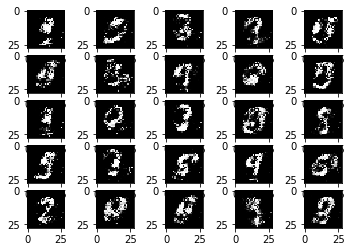

In [38]:
for step in range(10001):
    batch_x = mnist.train.next_batch(batch_size)[0]
    _, d_loss_train = sess.run([d_optimizer, d_loss], feed_dict = {x_d: batch_x, x_g: sample_Z(batch_size, g_dim)})
    _, g_loss_train = sess.run([g_optimizer, g_loss], feed_dict = {x_g: sample_Z(batch_size, g_dim)})
    if step%1000==0:
        print 'step:', step, ' d-loss:', d_loss_train, ' g-loss:', g_loss_train
        
gg = sess.run(g_sample, feed_dict = {x_g: zz})
gg_pic = np.array([np.reshape(m,(28,28)) for m in gg])
fig, ax = plt.subplots(nrows=5, ncols=5)
for i,row in enumerate(ax):
    for j,col in enumerate(row):
        ax[i][j].imshow(gg_pic[i*5+j], cmap='gray')

step: 0  d-loss: 0.174481  g-loss: 5.99492
step: 1000  d-loss: 0.219862  g-loss: 5.4267
step: 2000  d-loss: 0.208945  g-loss: 6.24669
step: 3000  d-loss: 0.170118  g-loss: 5.91492
step: 4000  d-loss: 0.141592  g-loss: 7.01944
step: 5000  d-loss: 0.168784  g-loss: 6.06432
step: 6000  d-loss: 0.1805  g-loss: 5.74884
step: 7000  d-loss: 0.228773  g-loss: 5.10472
step: 8000  d-loss: 0.277357  g-loss: 5.37303
step: 9000  d-loss: 0.291031  g-loss: 5.06447
step: 10000  d-loss: 0.390364  g-loss: 4.38717
step: 11000  d-loss: 0.424209  g-loss: 4.24864
step: 12000  d-loss: 0.35405  g-loss: 4.84514
step: 13000  d-loss: 0.303796  g-loss: 4.27867
step: 14000  d-loss: 0.384501  g-loss: 4.36083
step: 15000  d-loss: 0.305664  g-loss: 4.75412
step: 16000  d-loss: 0.369603  g-loss: 3.91254
step: 17000  d-loss: 0.262987  g-loss: 4.72253
step: 18000  d-loss: 0.426776  g-loss: 4.51184
step: 19000  d-loss: 0.346491  g-loss: 3.59152
step: 20000  d-loss: 0.41331  g-loss: 4.00743


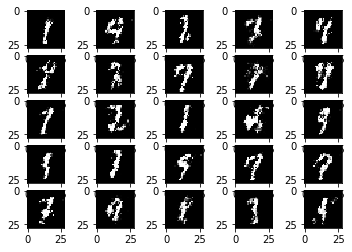

In [39]:
for step in range(20001):
    batch_x = mnist.train.next_batch(batch_size)[0]
    _, d_loss_train = sess.run([d_optimizer, d_loss], feed_dict = {x_d: batch_x, x_g: sample_Z(batch_size, g_dim)})
    _, g_loss_train = sess.run([g_optimizer, g_loss], feed_dict = {x_g: sample_Z(batch_size, g_dim)})
    if step%1000==0:
        print 'step:', step, ' d-loss:', d_loss_train, ' g-loss:', g_loss_train
        
gg = sess.run(g_sample, feed_dict = {x_g: zz})
gg_pic = np.array([np.reshape(m,(28,28)) for m in gg])
fig, ax = plt.subplots(nrows=5, ncols=5)
for i,row in enumerate(ax):
    for j,col in enumerate(row):
        ax[i][j].imshow(gg_pic[i*5+j], cmap='gray')

In [40]:
for step in range(50001):
    batch_x = mnist.train.next_batch(batch_size)[0]
    _, d_loss_train = sess.run([d_optimizer, d_loss], feed_dict = {x_d: batch_x, x_g: sample_Z(batch_size, g_dim)})
    _, g_loss_train = sess.run([g_optimizer, g_loss], feed_dict = {x_g: sample_Z(batch_size, g_dim)})
    if step%1000==0:
        print 'step:', step, ' d-loss:', d_loss_train, ' g-loss:', g_loss_train
        
gg = sess.run(g_sample, feed_dict = {x_g: zz})
gg_pic = np.array([np.reshape(m,(28,28)) for m in gg])
fig, ax = plt.subplots(nrows=5, ncols=5)
for i,row in enumerate(ax):
    for j,col in enumerate(row):
        ax[i][j].imshow(gg_pic[i*5+j], cmap='gray')

step: 0  d-loss: 0.356082  g-loss: 4.04123
step: 1000  d-loss: 0.338676  g-loss: 3.82331
step: 2000  d-loss: 0.304976  g-loss: 3.87274
step: 3000  d-loss: 0.300317  g-loss: 4.52927
step: 4000  d-loss: 0.351567  g-loss: 4.57217
step: 5000  d-loss: 0.343195  g-loss: 3.98775
step: 6000  d-loss: 0.345096  g-loss: 3.94104
step: 7000  d-loss: 0.315841  g-loss: 3.80116
step: 8000  d-loss: 0.381923  g-loss: 3.65309
step: 9000  d-loss: nan  g-loss: nan
step: 10000  d-loss: nan  g-loss: nan
step: 11000  d-loss: nan  g-loss: nan
step: 12000  d-loss: nan  g-loss: nan
step: 13000  d-loss: nan  g-loss: nan
step: 14000  d-loss: nan  g-loss: nan
step: 15000  d-loss: nan  g-loss: nan
step: 16000  d-loss: nan  g-loss: nan
step: 17000  d-loss: nan  g-loss: nan
step: 18000  d-loss: nan  g-loss: nan
step: 19000  d-loss: nan  g-loss: nan
step: 20000  d-loss: nan  g-loss: nan
step: 21000  d-loss: nan  g-loss: nan
step: 22000  d-loss: nan  g-loss: nan
step: 23000  d-loss: nan  g-loss: nan
step: 24000  d-loss:

AttributeError: 'MaskedConstant' object has no attribute '_fill_value'